# This is a script for demostrating how Morphorlogical Geodesic Active Contour algorithm works.

In [1]:
import morphsnakes

import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as ppl

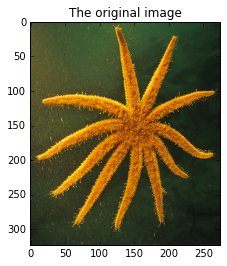

Image shape is (323, 275)


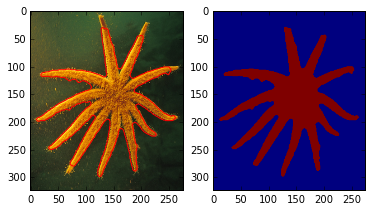

In [9]:
%matplotlib inline 

def rgb2gray(img):
    """Convert a RGB image to gray scale."""
    return 0.2989*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

def circle_levelset(shape, center, sqradius, scalerow=1.0):
    """Build a binary function with a circle as the 0.5-levelset."""
    # Generate a mesh grid
    grid = np.mgrid[list(map(slice, shape))].T - center
    
    phi = sqradius - np.sqrt(np.sum((grid.T)**2, 0))
    u = np.float_(phi > 0)
    return u

def test_starfish(alpha=1000,sigma=2,fig=1):
    # Load the image.
    imgcolor = imread("testimages/seastar2.png")/255.0
    # Show the image.
    ppl.imshow(imgcolor)
    ppl.title('The original image')
    ppl.show()
    
    img = rgb2gray(imgcolor)
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=alpha, sigma=sigma)
    
    # show the image shape
    # print "Image shape is " +str(img.shape)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=2, threshold=0.3, balloon=-1)
    # Why is the center set to be (163, 137)
    mgac.levelset = circle_levelset(img.shape, (163, 137), 135, scalerow=0.75)
    
    # Visual evolution.
    ppl.figure(fig)
    #ppl.title("alpha")
    #ppl.title("alpha=%i" % alpha)
    morphsnakes.evolve_visual(mgac, num_iters=110, background=imgcolor)
    
if __name__ == '__main__':
    print("""""")
    test_starfish()
    #test_starfish(100,2,2)
    #ppl.title("alpha")
    ppl.show()
    